#IMPORT

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [387]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


usa df1 o 2 o 3 per evitare lo sfasamento temporale

In [388]:
class_name = 'Occupancy'

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

dataset_path="/content/drive/Shared drives/DM2/files/df1.csv"
df = pd.read_csv(dataset_path, parse_dates=True, index_col='Date', date_parser=dateparse)

df.head()

del df['Hour']
del df['Day']
del df['TimeSlot']
del df['Weekend']
del df['WorkingHour']

#del df['Temperature']
#del df['Humidity']
#del df['Light']
#del df['CO2']
#del df['HumidityRatio']


df.loc[df["Occupancy"] == 1, "Occupancy"] = 'Yes'
df.loc[df["Occupancy"] == 0, "Occupancy"] = 'No'




df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Date,,,,,,
2015-02-02 14:19:00,15.904468,8.698835,7.516689,5.235582,10.795786,Yes
2015-02-02 14:20:00,15.957720,8.711492,7.452585,5.343291,10.831549,Yes
2015-02-02 14:21:00,15.993220,8.669303,7.398537,5.432407,10.799950,Yes
2015-02-02 14:22:00,15.971032,8.595474,6.654588,5.481292,10.709977,Yes
2015-02-02 14:23:00,16.064222,8.648209,6.606039,5.522164,10.806016,Yes
...,...,...,...,...,...,...
2015-02-04 10:39:00,17.649923,8.296638,9.617028,9.092412,11.068979,Yes
2015-02-04 10:40:00,17.768259,8.321951,9.633996,8.889977,11.146893,Yes
2015-02-04 10:41:00,17.768259,8.296638,9.701871,8.857280,11.118134,Yes


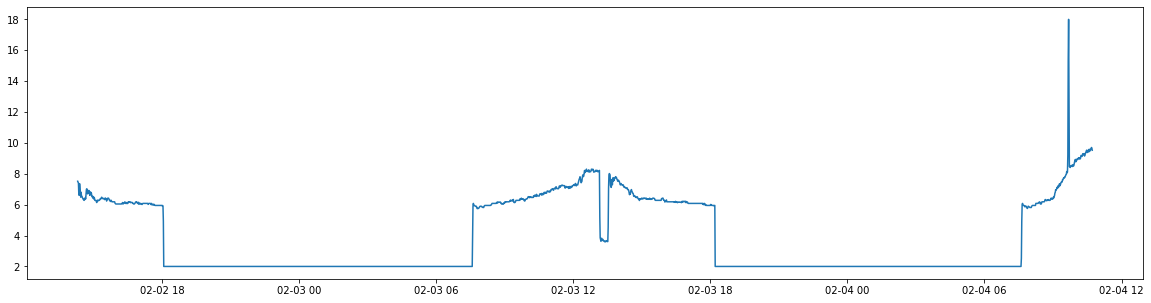

In [826]:
ts = df['Light']

plt.figure(figsize=(20,5))
plt.plot(ts)
plt.show()

In [390]:
ts = ts.values
ts

array([15.90446841, 15.95771957, 15.99322034, ..., 17.76825886,
       17.84714946, 18.        ])

# Data Preparation

In [391]:
!pip install tslearn
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

#una sola time series

In [0]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [0]:
# SAX transform
n_paa_segments = 100
n_sax_symbols = 30
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

In [601]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.1918161716813946: 0,
 -1.0364333894937898: 1,
 -0.9027347916438648: 2,
 -0.7835003753897741: 3,
 -0.6744897501960817: 4,
 -0.5729675484954635: 5,
 -0.47704042848944356: 6,
 -0.38532046640756773: 7,
 -0.29673783825989797: 8,
 -0.2104283942479247: 9,
 -0.12566134685507402: 10,
 -0.0417892978164538: 11,
 0.0: 12,
 0.04178929781645395: 13,
 0.12566134685507416: 14,
 0.21042839424792484: 15,
 0.29673783825989813: 16,
 0.47704042848944356: 17,
 0.6744897501960817: 18,
 0.7835003753897741: 19,
 0.9027347916438648: 20,
 1.0364333894937898: 21,
 1.191816171681394: 22,
 1.382994127100638: 23,
 1.6448536269514722: 24,
 2.128045234184983: 25}

In [602]:
sax_ts_inv.ravel()

array([2.12804523, 2.12804523, 2.12804523, ..., 0.        , 0.        ,
       0.        ])

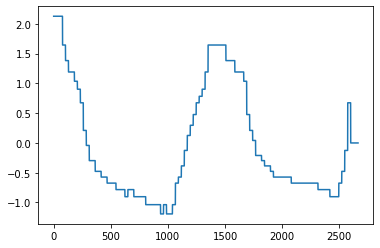

In [603]:
plt.plot(sax_ts_inv.ravel())
plt.show()

In [397]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.1503493803760079: 0,
 -0.9345892910734802: 1,
 -0.7554150263604693: 2,
 -0.5977601260424784: 3,
 -0.45376219016987945: 4,
 -0.18911842627279252: 5,
 -0.06270677794321385: 6,
 0.0: 7,
 0.18911842627279238: 8,
 0.45376219016987956: 9,
 0.7554150263604693: 10,
 0.93458929107348: 11,
 1.1503493803760079: 12,
 1.4395314709384563: 13,
 1.959963984540054: 14}

In [0]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

In [399]:
print (seq)

[14 14 14 ...  7  7  7]


#PIU' TIME SERIES

In [0]:
# SAX transform
n_paa_segments = 20
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)

In [940]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

dataset_path="/content/drive/Shared drives/DM2/files/temporal_splits/split_df3_60min_Light.csv"
X = pd.read_csv(dataset_path, parse_dates=True,  date_parser=dateparse)
del X['TimeSlot']
del X['Weekend']
del X['WorkingHour']
del X['Occupancy']
del X['Unnamed: 0']
X = X.to_numpy()
X

array([[6.16674032, 6.16438356, 6.16202681, ..., 6.04418913, 6.04418913,
        5.90278392],
       [5.99705406, 6.04418913, 6.04418913, ..., 6.08189719, 6.08189719,
        6.08189719],
       [6.08189719, 6.08189719, 6.08189719, ..., 5.94991899, 5.94991899,
        5.94991899],
       ...,
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.        , 2.        , 2.        , ..., 2.08798547, 2.12726469,
        2.19482496]])

In [0]:
X[0]

In [0]:
X = X.reshape(162,60,1)

In [0]:
X = scaler.fit_transform(X)

In [0]:
X_sax = sax.fit_transform(X)
sax_X_inv = sax.inverse_transform(X_sax)

In [0]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_X_inv.ravel()))}
map_symbols

In [0]:
X_sax.shape

In [0]:
X_sax[2]

In [0]:
sax_X_inv.shape

In [0]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_X_inv.ravel()))}

X_seq = list()
for x in sax_X_inv:
    X_seq.append([map_symbols.get(v, -1) for v in x.ravel()])

In [0]:
len(X_seq[0])

In [0]:
X_seq[0]

# Sequential Pattern Mining

In [0]:
len(X_sax)

In [0]:

# convert each element as integers

li = []
z=0

for z in range (0, len(X_sax)): 
  li.append([])

  j = X_sax[z]

  for i in j:
	    li[z].append(int(j[i]))

# print list as integers
print (li)

In [0]:
print(li[0])

In [0]:
!pip install prefixspan
from prefixspan import PrefixSpan

In [0]:
db = li

ps = PrefixSpan(db)

In [0]:
ps.frequent(90)

In [0]:
ps.frequent(110, closed=True)

In [0]:
ps.topk(100)

In [0]:
ps.topk(10, closed=True)